# Images
This notebook shows usage for the Image type.  This type is useful for loading single image files, reading the embedded metadata, and performing radiometric calibrations.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, time, os, datetime, glob
from micasense.image import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from platform import python_version

print(f"(Sys version) :|: {sys.version} :|:")
os.system("which python")
print(f"(Python version) :#: {python_version()} :#:")

(Sys version) :|: 3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 05:35:01) [MSC v.1916 64 bit (AMD64)] :|:
(Python version) :#: 3.7.12 :#:


.\data\0000SET\000
.\data\0000SET\000\IMG_0000_1.tif


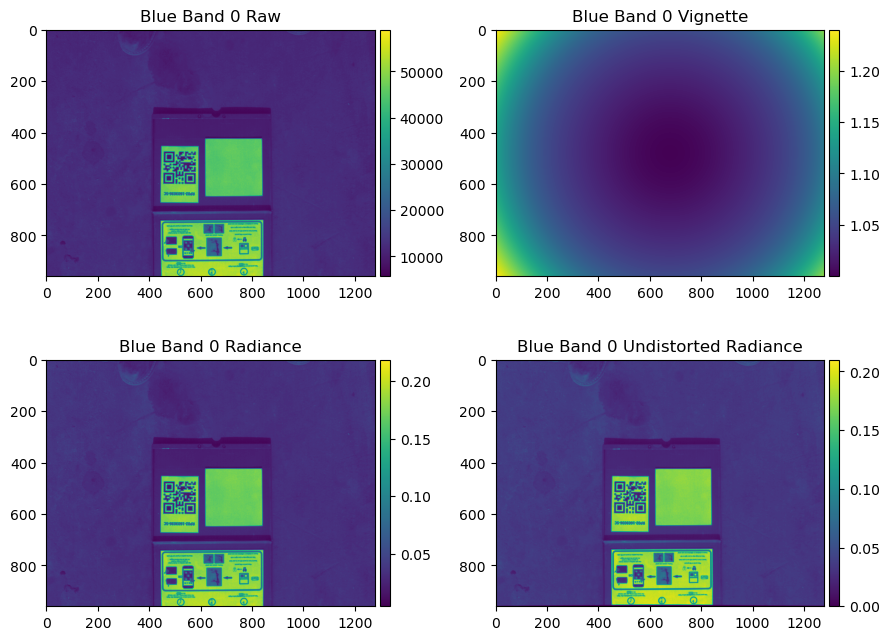

In [4]:
# Method 01
# imagePath = os.path.join('.','data','0000SET','000')
# imageName = os.path.join(imagePath,'IMG_0000_4.tif')

# Method 02
# Linux filepath
# imagePath = os.path.expanduser(os.path.join('~','Downloads','RedEdge3'))
# Windows filepath
# imagePath = os.path.join('c:\\','Users','robso','Downloads','RedEdge3')
imagePath = os.path.join('.','data','0000SET','000')
print(imagePath)

imageName = glob.glob(os.path.join(imagePath,'IMG_0000_1.tif'))[0]
print(imageName)

img = Image(imageName)
img.plot_all(figsize=(9,6.75),num=1)

# Image Histogram

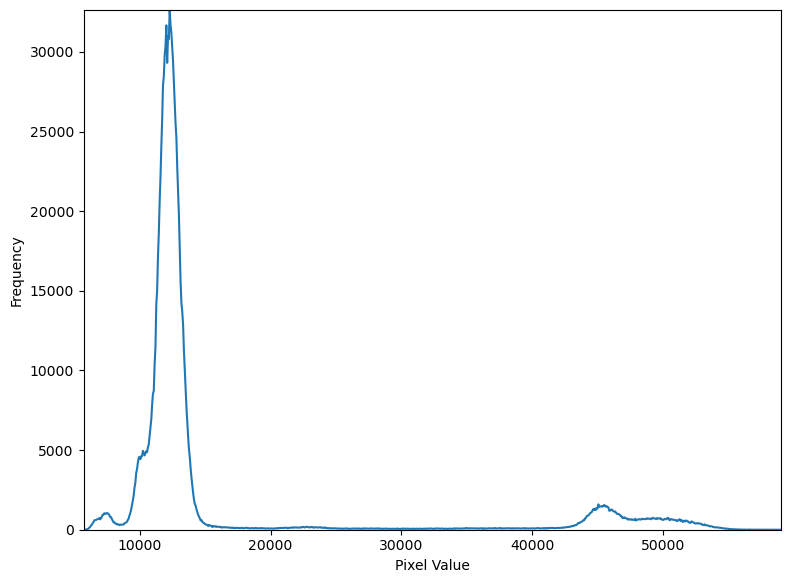

In [5]:
nbins = 1024
vmin = 0
vmax = 2**16
bins = range(vmin,vmax, int(vmax/nbins))
hist = cv2.calcHist([img.raw().ravel()],[0],None,[nbins],[vmin,vmax])
plt.figure(figsize=(9,6.75),num=2)
plt.plot(bins,hist)
plt.xlim(img.raw().min(),img.raw().max())
plt.ylim(0,hist.max())
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()
plt.close()

# Captures

Once you've mastered images, move on to groups of images, or [Captures](Captures.html)

---
Copyright (c) 2017-2019 MicaSense, Inc.  For licensing information see the [project git repository](https://github.com/micasense/imageprocessing)